Wine quality prediction involves using data analytics and machine learning techniques to evaluate and forecast the quality of wine based on various chemical properties and sensory data. By analyzing factors such as acidity, sugar content, alcohol level, and pH, predictive models can classify wines into different quality categories. This approach helps winemakers improve production processes, ensures consistent quality, and aids consumers in making informed choices. Leveraging historical data, these models can offer valuable insights, streamline quality control, and enhance the overall wine tasting experience.

### Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.




In [37]:
# Importing the required libraries.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

Now what are the Input and Target variables in the wine detection problem? Let’s have a look:

**Input variables:**

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

**Output variable:**

- quality (score between 0 and 10)

In [38]:
#data reading
data=pd.read_csv("/content/winequality-red.csv")


### Head

To take a closer look at the data, we take the help of “ .head()” function of pandas library which returns the first five observations of the data set. Similarly, “.tail()” returns last five observations of the data set.




In [39]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
print("Columns names in the data :",data.columns)

Columns names in the data : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Input Variables:¶
One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'.

All of these will help us predict the quality of the wine.

#### Variables/Features:¶
Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variable

Find out the total number of rows and columns in the dataset using `.shape`.

In [41]:
# shape of data.
data.shape

(1599, 12)

## Observations:
- Dataset comprises 1599 observations(rows) and 12 features(columns).
- Out of the 12, one is the target variable and rest 11 are input variables.

In [42]:
#Data type for all of the columns in the data
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Checking for Missing Values
Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

- df.isna() returns the dataframe with boolean values indicating missing values.
You can also choose to use notna() which is just the opposite of isna().
- df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.
- df.isna().sum() returns the number of missing values in each column.

In [43]:
#to check any missing value in the data.
data.isnull().values.any()

False

There is no missing value in any column

In [44]:
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking for Duplicates
Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.

Duplicates can be checked using the duplicated() method.

In [45]:
duplicate_entries = data[data.duplicated()]
duplicate_entries.shape

(240, 12)

In [46]:
print("Number of duplicated rows :",data.duplicated().sum())

Number of duplicated rows : 240


### Observations:
There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

In [47]:
data[data.duplicated(keep = 'first')].shape

(240, 12)

###  info()
`df.info` returns information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.



In [48]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observations:
The data has only float and integer values.

There are no missing values

### Get a Statistical Overview using Describe
The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

Let's explore different statistical measures that we have got from describe().
- count: total count of non-null values in the column
- mean: the average of all the values in that column
- min: the minimum value in the column
- max: the maximum value in the column
- 25%: first quartile in the column after we arrange those values in ascending order
- 50%: this is the median or the second quartile
- 75%: the third quartile
- std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)
Note: 25%, 50%, and 75% are nothing but corresponding percentile values

In [49]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Observations:
Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2).

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile)

Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

### Unique Values of Quality(Target Variable)

In [50]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

### Observations:
Few key insights just by looking at the target variable are as follows:

Target variable/Dependent variable is discrete and categorical in nature.

“quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.

1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

### Frequency Counts of each Quality Value

In [51]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Observations:
This tells us the vote count of each quality score in descending order.

“quality” has most values concentrated in the categories 5, 6 and 7.

Only a few observations made for the categories 3 & 8

In [52]:
bins=[0,5,7,10]
labels=[0,1,2]
data['wine_quality']=pd.cut(data['quality'],bins=bins,labels=labels)

In [53]:

Counter(data["wine_quality"])

Counter({0: 744, 1: 837, 2: 18})

In [54]:
Counter(data["quality"])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

### Renaming Columns

Let's rename the columns which contain spaces in their names and replace the spaces with underscores.

In [55]:
data.rename({'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
       'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality'],
      dtype='object')

# Correlation Matrix with Heatmap
Correlation:
Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

Every single successful data science project revolves around finding accurate correlations between the input and target variables. However more than often, we oversee how crucial correlation analysis is.

It is recommended to perform correlation analysis before and after data gathering and transformation phases of a data science project.

 There are three different types of correlations:

1. Positive Correlation: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases (also decreases when the other decreases).
Eg. The more time you spend running on a treadmill, the more calories you will burn.

2. Negative Correlation: Two features (variables) can be negatively correlated with each other. This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional).
Eg. As the weather gets colder, air conditioning costs decrease.

3. No Correlation: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted.

Eg. There is no relationship between the amount of tea drunk and level of intelligence.
- Each of these correlation types exists in a spectrum represented by values from -1 to +1 where slight or high positive correlation features can be like 0.5 or 0.7.

- A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.
- If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. Values close to zero indicates no correlation.

We can check how each feature is related to others using corr() function.



In [56]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.094288
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.320968
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.165994
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.001474
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.113781
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.064615
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231076
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.170227
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.009287
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.223183


From the above correlation matrix, we can observe that there is a relatively high positive correlation between **fixed_acidity** and **citric_acid**, **fixed_acidity** and **density**.

Similarly we can observe there is a relatively high negative correlation between **fixed_acidity** and **pH**. There is relatively high positive correlation between alcohol presence and quality of the wines.



Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

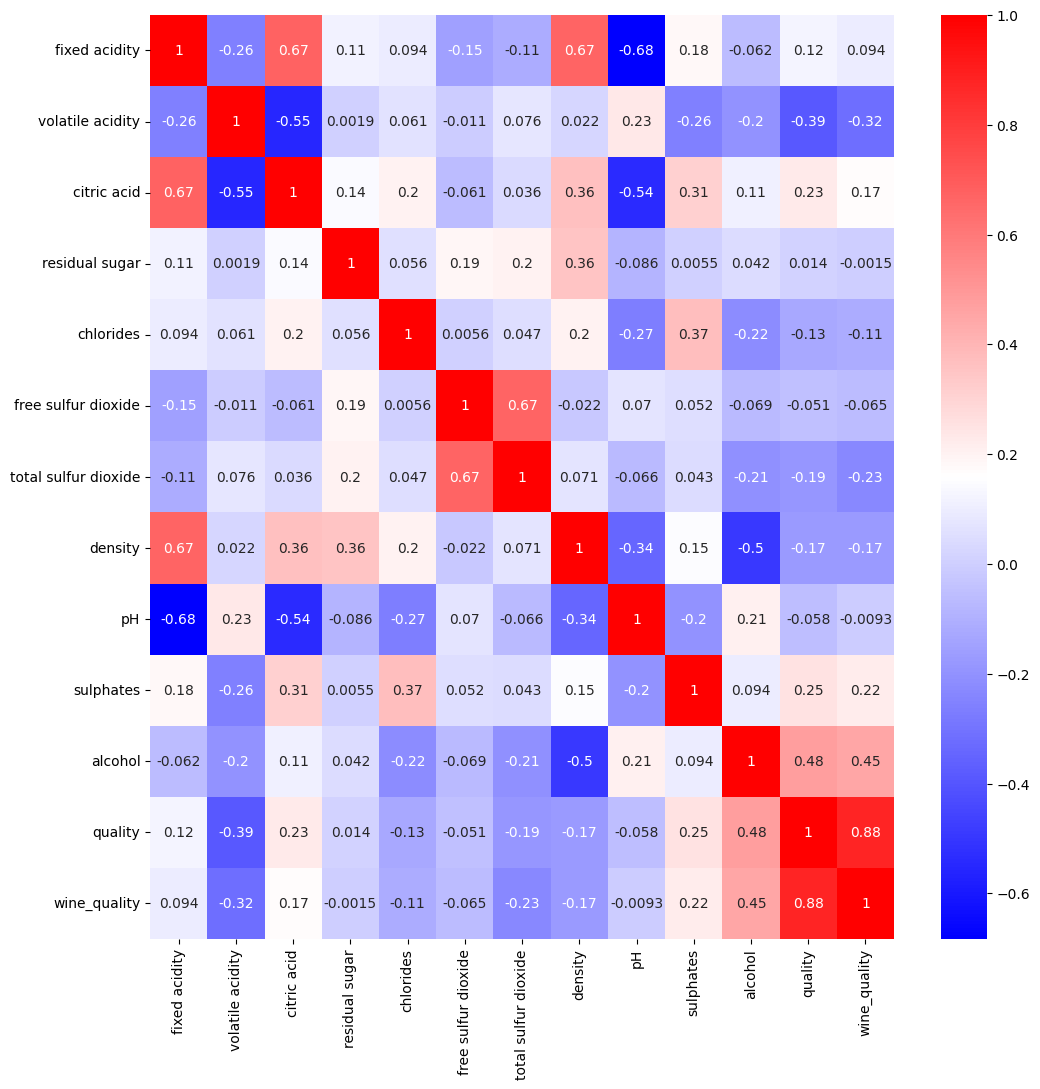

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(),annot=True,cmap="bwr")
plt.show()

### Observations:
Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.

There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
There is a relatively high negative correlation between fixed_acidity and pH.

Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
citric acid & volatile acidity have negative correlation.

free sulphur dioxide & total sulphur dioxide have positive correlation.

### Graphical Relation between the data variables.

We can visualize scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other. 'pairplot' of seaborn helps to achieve this

### Pair Plot
The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot function of seaborn helps to achieve this

## Histogram
Histograms use bars to visualize data as well. Many people may not even realize there is a difference between a histogram and a bar chart. They practically look the same from a distance.

The key is that a histogram looks solely at quantitative variables while a bar chart looks at categorical variables. That’s why the bars in a histogram are typically grouped together without spacing in between the bars.

### Count Plot
The variable quality is categorical in nature and we can visualize these types of variables using barplot or countplot.

Count plot is a graphical display to show the number of occurrences or frequency for each categorical data using bars.


Let's plot a histogram now! On calling the hist( ) method on a DataFrame, you'll get histograms for all the Series.

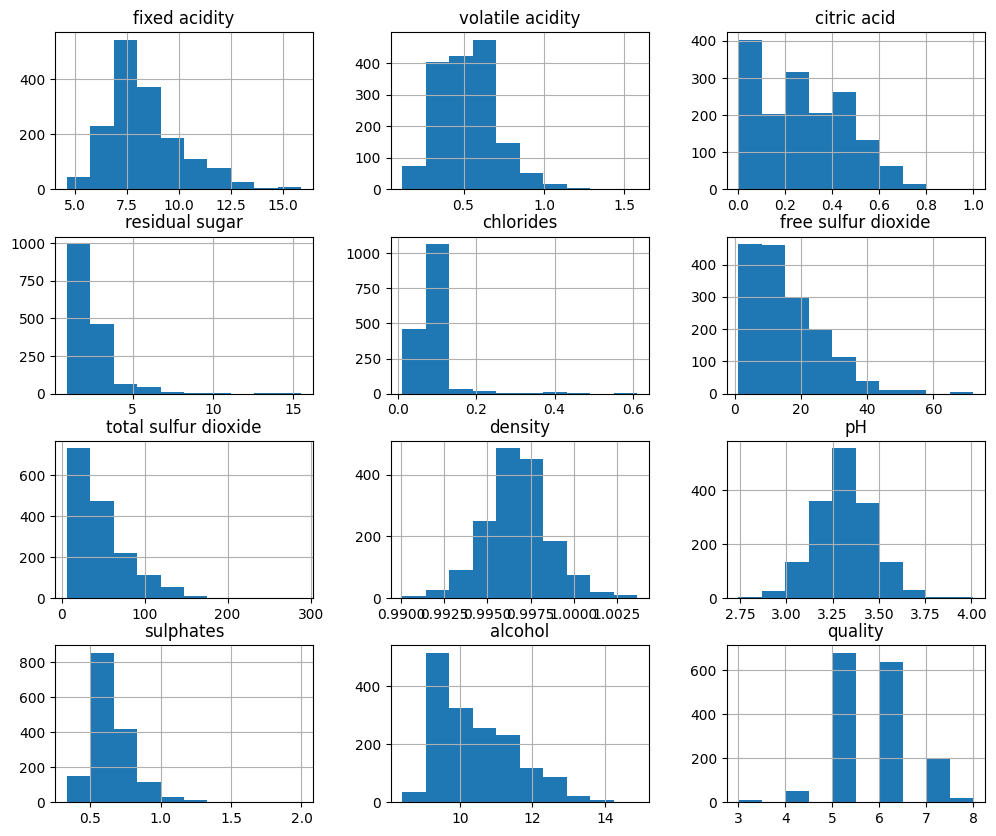

In [58]:
data.hist(bins=10,figsize=(12,10))
plt.show()

## Observations:
The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
The attributes 'density' and 'pH' are quite normally distributed.

Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

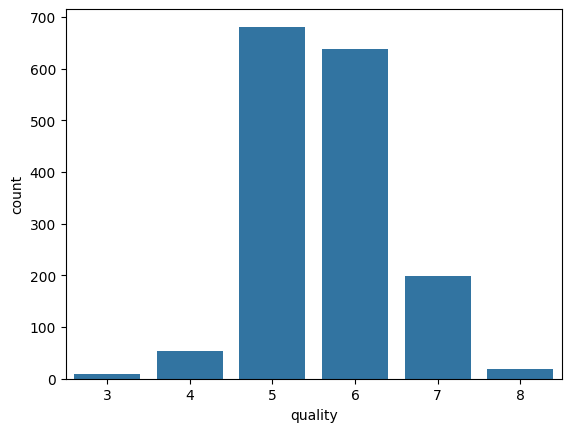

In [59]:
sns.countplot(x="quality",data=data)
plt.show()

#### Observation:
The average(5-7) quality of wines are more than good(1-4) and bad(8-10) quality of wines.

<Axes: xlabel='wine_quality', ylabel='count'>

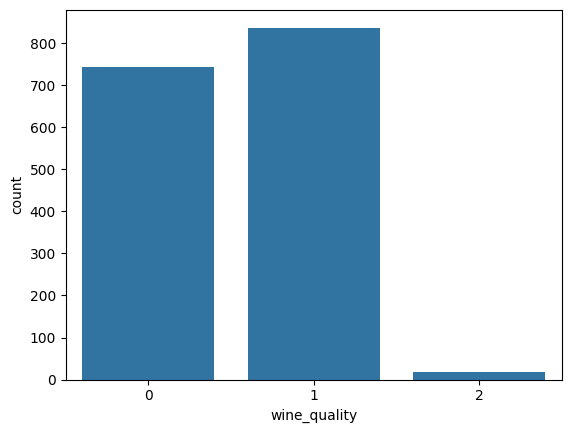

In [60]:
sns.countplot(x="wine_quality",data=data)

### Box Plot
A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

1. minimum
2. first quartile (Q1)
3. median
4. third quartile (Q3)
5. maximum

### Observation:
The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.

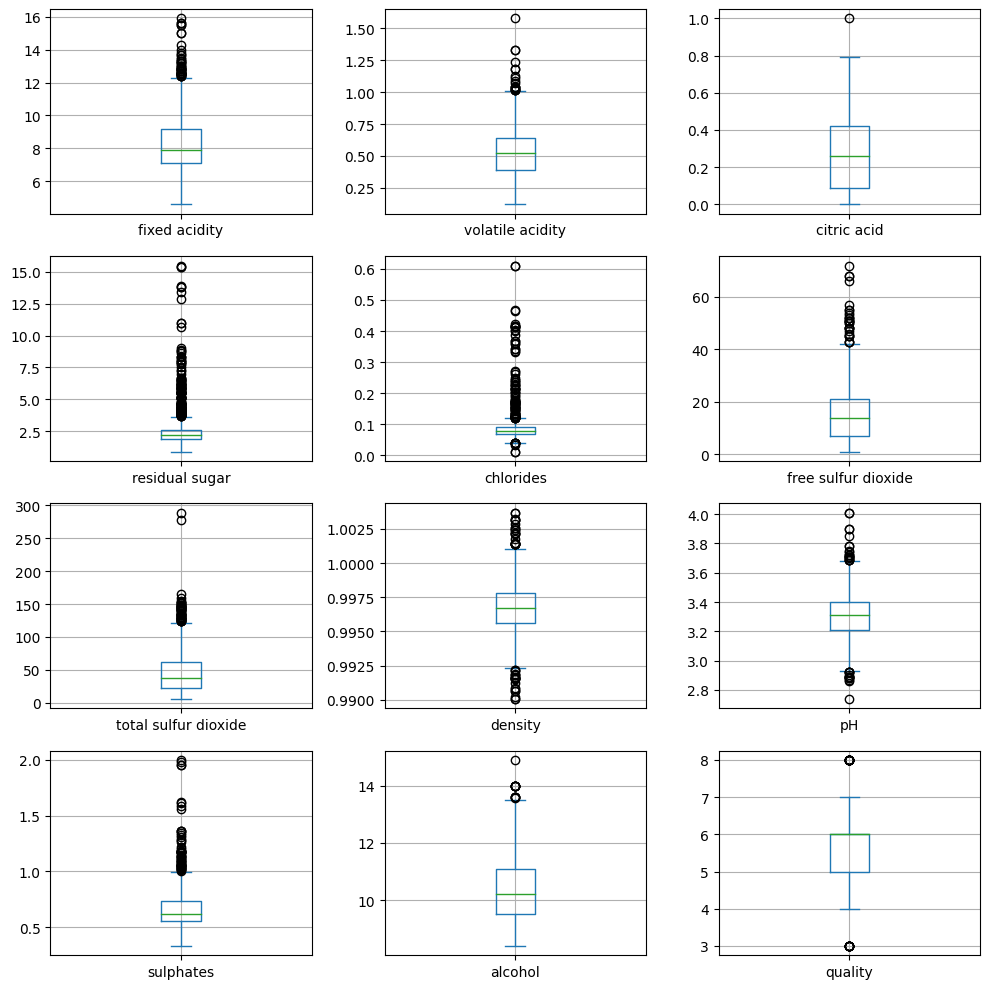

In [61]:
data.plot(kind='box',subplots=True,layout=(4,3),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [63]:
X=data.iloc[:,:-2]
Y=data.iloc[:,-1:]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


**Scaling of the data**

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
sc=MinMaxScaler()
data=sc.fit_transform(X)
data[:5]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462],
       [0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615]])

In [66]:
train_x,test_x,train_y,test_y=train_test_split(data,Y,test_size=0.15,random_state=2)

In [67]:
print("shape of train input data:",train_x.shape)

shape of train input data: (1359, 11)


In [68]:
print("shape of train output data",train_y.shape)

shape of train output data (1359, 1)


In [69]:
print("shape of test input data ",test_x.shape)

shape of test input data  (240, 11)


In [70]:
print("shape of test output data",test_y.shape)

shape of test output data (240, 1)


### LogisticRegression Model

In [71]:
model=LogisticRegression()
model.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [72]:
pred=model.predict(test_x)
pred[:5]

array([1, 1, 0, 0, 0])

In [73]:
print("Accuracy Score using logistic regression:",accuracy_score(pred,test_y))


Accuracy Score using logistic regression: 0.7291666666666666


### Support Vector Machine

In [74]:
svc=SVC()
svc.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [75]:
pred=svc.predict(test_x)
pred[:5]

array([1, 1, 0, 1, 0])

In [76]:
print("Accuracy Score by using support vector machine:",accuracy_score(pred,test_y))


Accuracy Score by using support vector machine: 0.7458333333333333


## Decision Tree Classifier

In [77]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)

<ipython-input-77-e31320fe5541>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x,train_y)


RandomForestClassifier()

In [78]:
pred_rf=rf.predict(test_x)
pred_rf[:5]

array([1, 1, 1, 0, 0])

In [79]:
print("Accuracy Score by using Random forest classifier:",accuracy_score(pred_rf,test_y))


Accuracy Score by using Random forest classifier: 0.8041666666666667
